#Named Entity Recognition - Shravan Srinivasan

In [207]:
import pandas as pd
import re
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support

In [208]:
df = pd.read_csv('A.D.I.T.I.csv')

In [209]:
df

,Sentences,Unnamed: 1
0,My ds3 is diagnosed autistic. I think 30 years...,NaN
1,I can remember distinctly at the age of 6 or 7...,NaN
2,I had some very slight concerns before but i'm...,NaN
3,At that age the 3 things that really struck me...,NaN
4,He is now 9.5 months old and I think clearly a...,NaN
...,...,...
208,[Doesn't use](A_behavioural) toys or other obj...,NaN
209,"May have a [good rote memory](A_behavioural), ...",NaN
210,May [lose language](A_vocal) or other social m...,NaN
211,[Unusual](A_behavioural) use of vision or gaze...,NaN


In [210]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2, random_state = 10)

In [211]:
test.head()

,Sentences,Unnamed: 1
211,[Unusual](A_behavioural) use of vision or gaze...,NaN
185,[doesnt interact](A_behavioural) properly with...,NaN
26,My child has [Delay](A_behavioural) in Learnin...,NaN
78,"when i leave for office, my son is [not crying...",NaN
87,Sometimes he [blabbers](A_behavioural) unneces...,NaN


In [212]:
def func(str1):
  # print(str1)
  beg = 0
  str1 = str1.lower()
  st = str1.find("[")
  end = str1.find("]")
  round = re.findall(r'\(.*?\)', str1)
  square = re.findall(r'\[.*?\]', str1)
  if(len(round)!=len(square)):
    return      
  rs = [[round[i][1:-1], square[i][1:-1]] for i in range(len(round))]
  str2 = re.sub('\(.*?\)','', str1)
  # str2 = re.sub('\W+',' ', str2)
  # Newly added start
  str2 = str2.replace("[", "")
  str2 = str2.replace("]", "")
  str2 = str2.replace("  ", " ")
  str2 = str2.replace(" . ", ". ")
  str2 = str2.replace(" , ", ", ")
  # str2 = str2.replace("(", "")
  # str2 = str2.replace(")", "")
  # Newly added end
  for i in range(len(rs)):
    beg = str2.find(rs[i][1], beg)
    end = beg + len(rs[i][1])
    rs[i].append(beg)
    rs[i].append(end)
  rs2 = [(rs[i][2], rs[i][3], rs[i][0]) for i in range(len(rs))]
  d = {"entities": rs2}
  dd = (str2, d)
  train = []
  train.append(dd)
  return train

In [213]:
train_data = []
train_data = train['Sentences'].apply(func)

In [214]:
type(train_data)

pandas.core.series.Series

In [215]:
td = train_data.tolist() #converting it to list

In [216]:
type(td)

list

In [217]:
#Removing none values from the list
Not_none_values = filter(None.__ne__, td)
td = list(Not_none_values)

In [218]:
def flatten(l):
    try:
        return flatten(l[0]) + (flatten(l[1:]) if len(l) > 1 else []) if type(l) is list else [l]
    except IndexError:
        return []

In [219]:
#Making it a 1D list
td = flatten(td)

In [220]:
td

[('breaking open the toys, climbing on various kinds of furniture. ',
  {'entities': [(0, 8, 'a_behavioural'), (24, 32, 'a_behavioural')]}),
 ("can't start a conversation", {'entities': [(0, 11, 'a_behavioural')]}),
 ('yes, but sometimes he stammers when nervous',
  {'entities': [(22, 30, 'a_behavioural')]}),
 ('yes, she gets scared when any person slightly raises his/ her tone of voice',
  {'entities': [(14, 20, 'a_behavioural')]}),
 ('he is very withdrawn from people. he gets distracted easily and has poor motor skills.',
  {'entities': [(6, 20, 'a_behavioural'), (42, 59, 'a_behavioural')]}),
 (" thinking studies can't help a human in life",
  {'entities': [(18, 28, 'a_behavioural')]}),
 ("we gave him more space and a people free area if his own, his behaviour changed. massive improvement, more reasonable etc. when he needs us he knows where we are and our conversations became with him rather than at him. sounds stupid i know but in his case he just needed space and it's done him the

In [221]:
len(td)

163

In [222]:
test_data = []
test_data = test['Sentences'].apply(func)

In [223]:
type(test_data)

pandas.core.series.Series

In [224]:
testing = test_data.tolist() #converting it to list

In [225]:
type(testing)

list

In [226]:
#Removing none values from the list
Not_none_values = filter(None.__ne__, testing)
testing = list(Not_none_values)

In [227]:
def flatten(l):
    try:
        return flatten(l[0]) + (flatten(l[1:]) if len(l) > 1 else []) if type(l) is list else [l]
    except IndexError:
        return []

In [228]:
#Making it a 1D list
testing = flatten(testing)

In [229]:
testing

[('unusual use of vision or gaze—looks at objects from unusual angles\n',
  {'entities': [(0, 7, 'a_behavioural')]}),
 ('doesnt interact properly with peers',
  {'entities': [(0, 15, 'a_behavioural')]}),
 ('my child has delay in learning to speak',
  {'entities': [(13, 18, 'a_behavioural'), (34, 39, 'a_vocal')]}),
 ('when i leave for office, my son is not crying',
  {'entities': [(35, 45, 'a_behavioural')]}),
 ('sometimes he blabbers unnecessarily',
  {'entities': [(13, 21, 'a_behavioural')]}),
 ("eye contact - he actively avoids eye contact. if you hold him up in front of your face he'll do anything he can to not look you in the eyes. from a distance he's much better but up close it's really noticeable.\n",
  {'entities': [(26, 32, 'a_intensity')]}),
 ('op, mine is midst diagnosis, but so far it seems to be accepted that he is.\ninitially we thought he had elective mutism. he was referred to salt. and also had audiology test',
  {'entities': [(113, 119, 'a_vocal')]}),
 ('my child won’

In [230]:
len(testing)

43

#Visualising the different labels

In [231]:
def funcl(str1):
  main_round = []
  # print(str1)
  beg = 0
  str1 = str1.lower()
  st = str1.find("[")
  end = str1.find("]")
  round = re.findall(r'\(.*?\)', str1)
  square = re.findall(r'\[.*?\]', str1)
  if(len(round)!=len(square)):
    return      
  
  for i in round:
    rs = [[round[i][1:-1]] for i in range(len(round))]
    main_round.append(rs)
  return main_round

In [232]:
lab = df['Sentences'].apply(funcl)

In [233]:
type(lab)

pandas.core.series.Series

In [234]:
lab = lab.to_list()

In [235]:
lab = flatten(lab)

In [236]:
Not_none_values = filter(None.__ne__, lab)
lab = list(Not_none_values)

In [237]:
data = pd.DataFrame(list(zip(lab)), 
               columns =['Label']) 

In [238]:
data['Label'].unique()

array(['a_behavioural', 'a_intensity', 'a_vocal'], dtype=object)

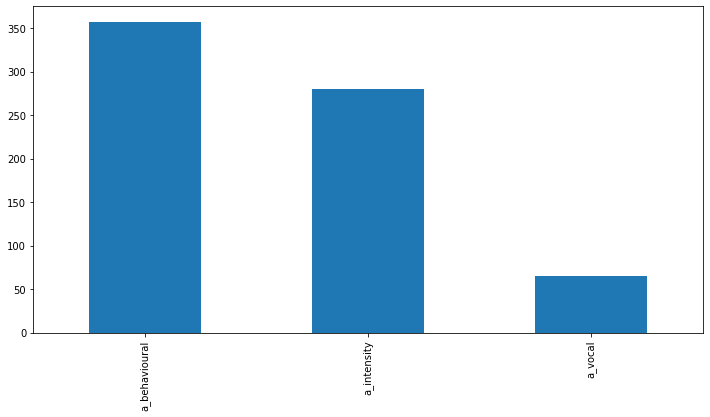

In [239]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,6))
data['Label'].value_counts().plot(kind = 'bar')
plt.show()

# Spacy Training

# New

In [240]:
import spacy
import random
from spacy.scorer import Scorer
from spacy.gold import GoldParse

################### Train Spacy NER.###########
def train_spacy(epochs=30):

    TRAIN_DATA = td #train data
    nlp = spacy.blank('en')  # create blank Language class
    # create the built-in pipeline components and add them to the pipeline
    # nlp.create_pipe works for built-ins that are registered with spaCy
    if 'ner' not in nlp.pipe_names:
        ner = nlp.create_pipe('ner')
        nlp.add_pipe(ner, last=True)
       

    # add labels
    for _, annotations in TRAIN_DATA:
         for ent in annotations.get('entities'):
            ner.add_label(ent[2])

    # get names of other pipes to disable them during training
    other_pipes = [pipe for pipe in nlp.pipe_names if pipe != 'ner']
    with nlp.disable_pipes(*other_pipes):  # only train NER
        optimizer = nlp.begin_training()
        for itn in range(epochs):
            print("Starting iteration " + str(itn))
            random.shuffle(TRAIN_DATA)
            losses = {}
            for text, annotations in TRAIN_DATA:
                nlp.update(
                    [text],  # batch of texts
                    [annotations],  # batch of annotations
                    drop=0.3,  # dropout - make it harder to memorise data
                    sgd=optimizer,  # callable to update weights
                    losses=losses)
            print(losses)
            # Saving model to disk
            nlp.to_disk("NER")
    return nlp

In [241]:
# Training the NER model for N Epochs
nlp = train_spacy(35)

Starting iteration 0
{'ner': 583.7354585570446}
Starting iteration 1
{'ner': 476.4906923644955}
Starting iteration 2
{'ner': 416.734792487973}
Starting iteration 3
{'ner': 347.9231578571645}
Starting iteration 4
{'ner': 392.4637724222665}
Starting iteration 5
{'ner': 348.29524703598395}
Starting iteration 6
{'ner': 283.32888146462227}
Starting iteration 7
{'ner': 227.50867116335777}
Starting iteration 8
{'ner': 170.25294704310542}
Starting iteration 9
{'ner': 187.0961938650431}
Starting iteration 10
{'ner': 161.40406984234127}
Starting iteration 11
{'ner': 173.1616630465639}
Starting iteration 12
{'ner': 178.76179719275294}
Starting iteration 13
{'ner': 136.92455327885693}
Starting iteration 14
{'ner': 140.22094460276648}
Starting iteration 15
{'ner': 115.41377312414642}
Starting iteration 16
{'ner': 94.28187989190079}
Starting iteration 17
{'ner': 162.18662441300182}
Starting iteration 18
{'ner': 144.31548087279518}
Starting iteration 19
{'ner': 102.93408968266499}
Starting iteration 

In [242]:
! zip -r NER.zip NER/

updating: NER/ (stored 0%)
updating: NER/ner/ (stored 0%)
updating: NER/ner/model (deflated 8%)
updating: NER/ner/cfg (deflated 47%)
updating: NER/ner/moves (deflated 66%)
updating: NER/meta.json (deflated 41%)
updating: NER/tokenizer (deflated 83%)
updating: NER/vocab/ (stored 0%)
updating: NER/vocab/strings.json (deflated 71%)
updating: NER/vocab/key2row (stored 0%)
updating: NER/vocab/vectors (deflated 45%)
updating: NER/vocab/lexemes.bin (deflated 76%)


#Prediction

In [243]:
nlp = spacy.load("NER")

In [244]:
for text,annot in testing:
  doc = nlp(text)

# Testing the model
  print(text)
  
  print("Entities", [(ent.text, ent.label_) for ent in doc.ents])
  print('\n')

unusual use of vision or gaze—looks at objects from unusual angles

Entities [('unusual use', 'a_behavioural'), ('gaze—looks', 'a_behavioural'), ('unusual angles', 'a_behavioural')]


doesnt interact properly with peers
Entities [('doesnt interact', 'a_behavioural')]


my child has delay in learning to speak
Entities [('has delay', 'a_vocal'), ('learning', 'a_behavioural')]


when i leave for office, my son is not crying
Entities [('crying', 'a_behavioural')]


sometimes he blabbers unnecessarily
Entities []


eye contact - he actively avoids eye contact. if you hold him up in front of your face he'll do anything he can to not look you in the eyes. from a distance he's much better but up close it's really noticeable.

Entities [('eye contact', 'a_behavioural')]


op, mine is midst diagnosis, but so far it seems to be accepted that he is.
initially we thought he had elective mutism. he was referred to salt. and also had audiology test
Entities [('accepted', 'a_behavioural'), ('elective'

#Score

In [245]:
import spacy
from spacy.gold import GoldParse
from spacy.scorer import Scorer

def evaluate(ner_model, examples):
    scorer = Scorer()
    for input_, annot in examples:
        doc_gold_text = ner_model.make_doc(input_)
        gold = GoldParse(doc_gold_text, entities=annot['entities'])
        pred_value = ner_model(input_)
        scorer.score(pred_value, gold)
    return scorer.scores

In [246]:
results = evaluate(nlp, testing)

In [247]:
print(results["ents_per_type"])

{'a_behavioural': {'p': 27.659574468085108, 'r': 34.21052631578947, 'f': 30.58823529411765}, 'a_vocal': {'p': 20.0, 'r': 10.0, 'f': 13.333333333333334}, 'a_intensity': {'p': 42.10526315789473, 'r': 42.10526315789473, 'f': 42.10526315789473}}


#Validation


In [248]:
  text = "he is angry always"
  doc = nlp(text)

# Testing the model
  print(text)
  
  print("Entities", [(ent.text, ent.label_) for ent in doc.ents])
  print('\n')

he is angry always
Entities [('angry', 'a_intensity')]


